In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/AI/Potato_AI",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16033 files belonging to 3 classes.


In [ ]:

class_names = dataset.class_names
class_names


['Potato___early_blight', 'Potato___healthy', 'Potato___late_blight']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 2 2 2 2 2 0 0 2 1 0 0 1 2 2 2 2 2 0 1 0 0 1 2 2 1 2 1 0 1 1]


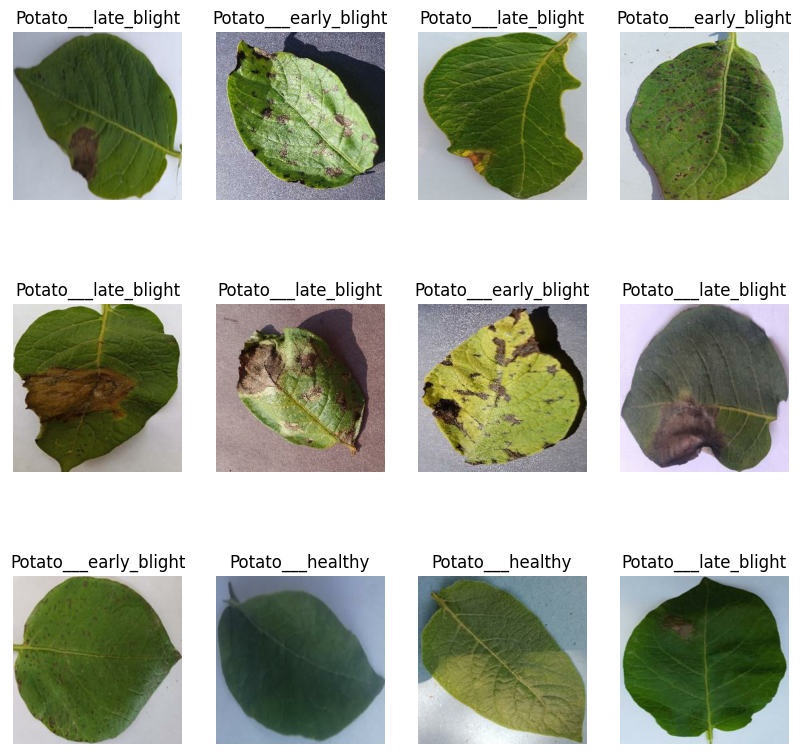

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
dataset_size = len(list(dataset))
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
model = models.Sequential([
    # Add input shape to the first layer
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),

    # Rescaling
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.5),
    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,664,387 (25.42 MB)

 Trainable params: 6,664,387 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Or 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.4772 - loss: 0.9780 - val_accuracy: 0.7088 - val_loss: 0.6625 - learning_rate: 0.0010
Epoch 2/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.7538 - loss: 0.6014 - val_accuracy: 0.8662 - val_loss: 0.3500 - learning_rate: 0.0010
Epoch 3/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.8640 - loss: 0.3706 - val_accuracy: 0.8756 - val_loss: 0.3198 - learning_rate: 0.0010
Epoch 4/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9014 - loss: 0.2746 - val_accuracy: 0.9563 - val_loss: 0.1438 - learning_rate: 0.0010
Epoch 5/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.9252 - loss: 0.2118 - val_accuracy: 0.9700 - val_loss: 0.1268 - learning_rate: 0.0010
Epoch 6/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9326 - loss: 0.1970 - val_accuracy: 0.9513 - val_loss: 0.1309 - learning_rate: 0.0010
Epoch 7/50
401/401 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9486 - 

In [ ]:
scores = model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9914 - loss: 0.0393


In [ ]:
history.params


{'verbose': 'auto', 'epochs': 50, 'steps': 401}

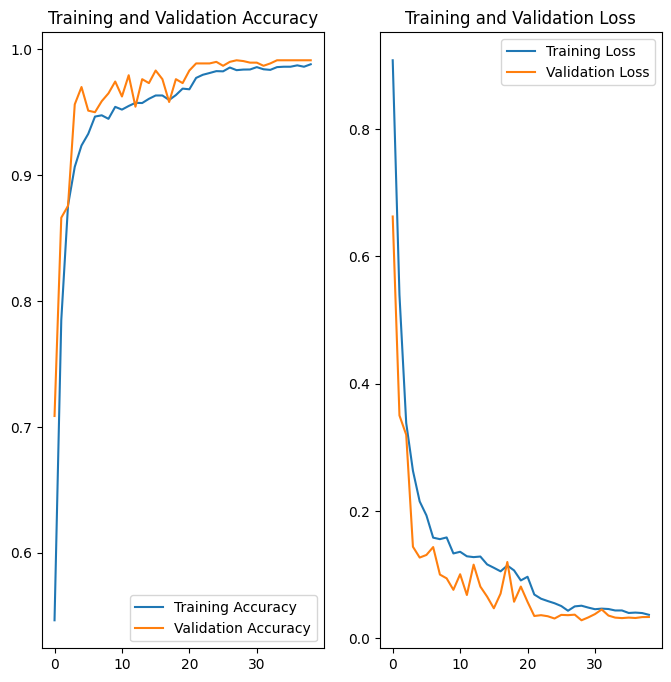

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Get the actual number of epochs the training ran for
num_epochs = len(acc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# Use num_epochs to generate the x-axis values
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
# Use num_epochs to generate the x-axis values
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step


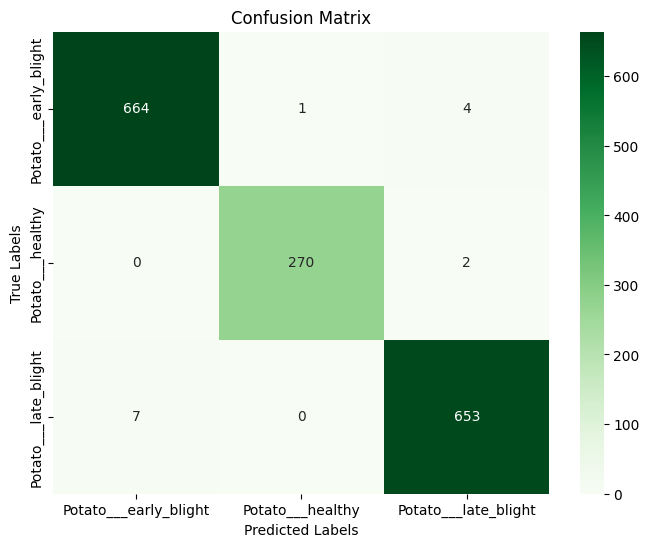

In [ ]:
# prompt: write a code for confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = tf.keras.models.load_model('/content/drive/MyDrive/potato_disease_model.keras')
# Get predictions on the test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# prompt: write a code that gets me the f1 score percison and recall and any statsics of the model  and visualize it

from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Get predictions on the test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Print the report
print(classification_report(true_labels, predicted_labels, target_names=class_names))


# Extract relevant metrics
accuracy = report['accuracy']
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Macro Precision: {macro_precision}")
print(f"Macro Recall: {macro_recall}")
print(f"Macro F1-score: {macro_f1}")
print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")
print(f"Weighted F1-score: {weighted_f1}")

# Visualize the classification report (optional)
import pandas as pd
df = pd.DataFrame(report).transpose()
df
# You can further customize the visualization of the dataframe 'df' as needed.

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
                       precision    recall  f1-score   support

Potato___early_blight       0.99      1.00      0.99       658
     Potato___healthy       1.00      0.99      1.00       273
 Potato___late_blight       0.99      0.99      0.99       670

             accuracy                           0.99      1601
            macro avg       0.99      0.99      0.99      1601
         weighted avg       0.99      0.99      0.99      1601

Accuracy: 0.9925046845721424
Macro Precision: 0.9939803173109975
Macro Recall: 0.992555653654415
Macro F1-score: 0.9932597206568454
Weighted Precision: 0.992521752662478
Weighted Recall: 0.9925046845721424
Weighted F1-score: 0.992506250115364


,precision,recall,f1-score,support
Potato___early_blight,0.989426,0.995441,0.992424,658.000000
Potato___healthy,1.000000,0.992674,0.996324,273.000000
Potato___late_blight,0.992515,0.989552,0.991031,670.000000
accuracy,0.992505,0.992505,0.992505,0.992505
macro avg,0.993980,0.992556,0.993260,1601.000000
weighted avg,0.992522,0.992505,0.992506,1601.000000


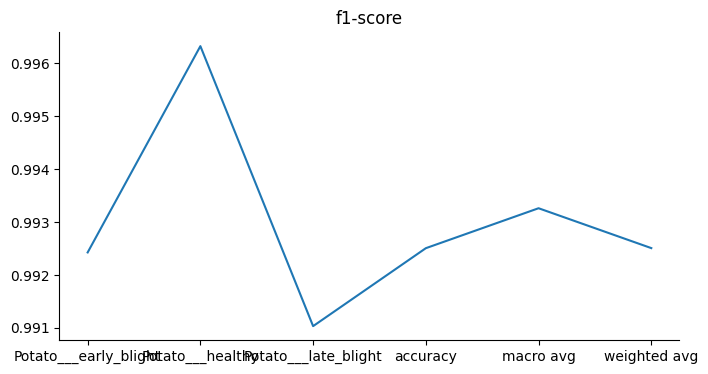

In [ ]:
# @title f1-score

from matplotlib import pyplot as plt
df['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

first image to predict
actual label: Potato___early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
predicted label: Potato___early_blight


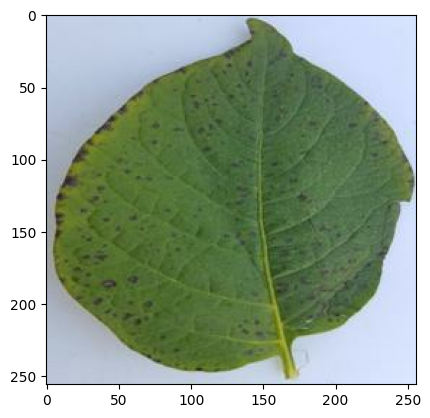

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


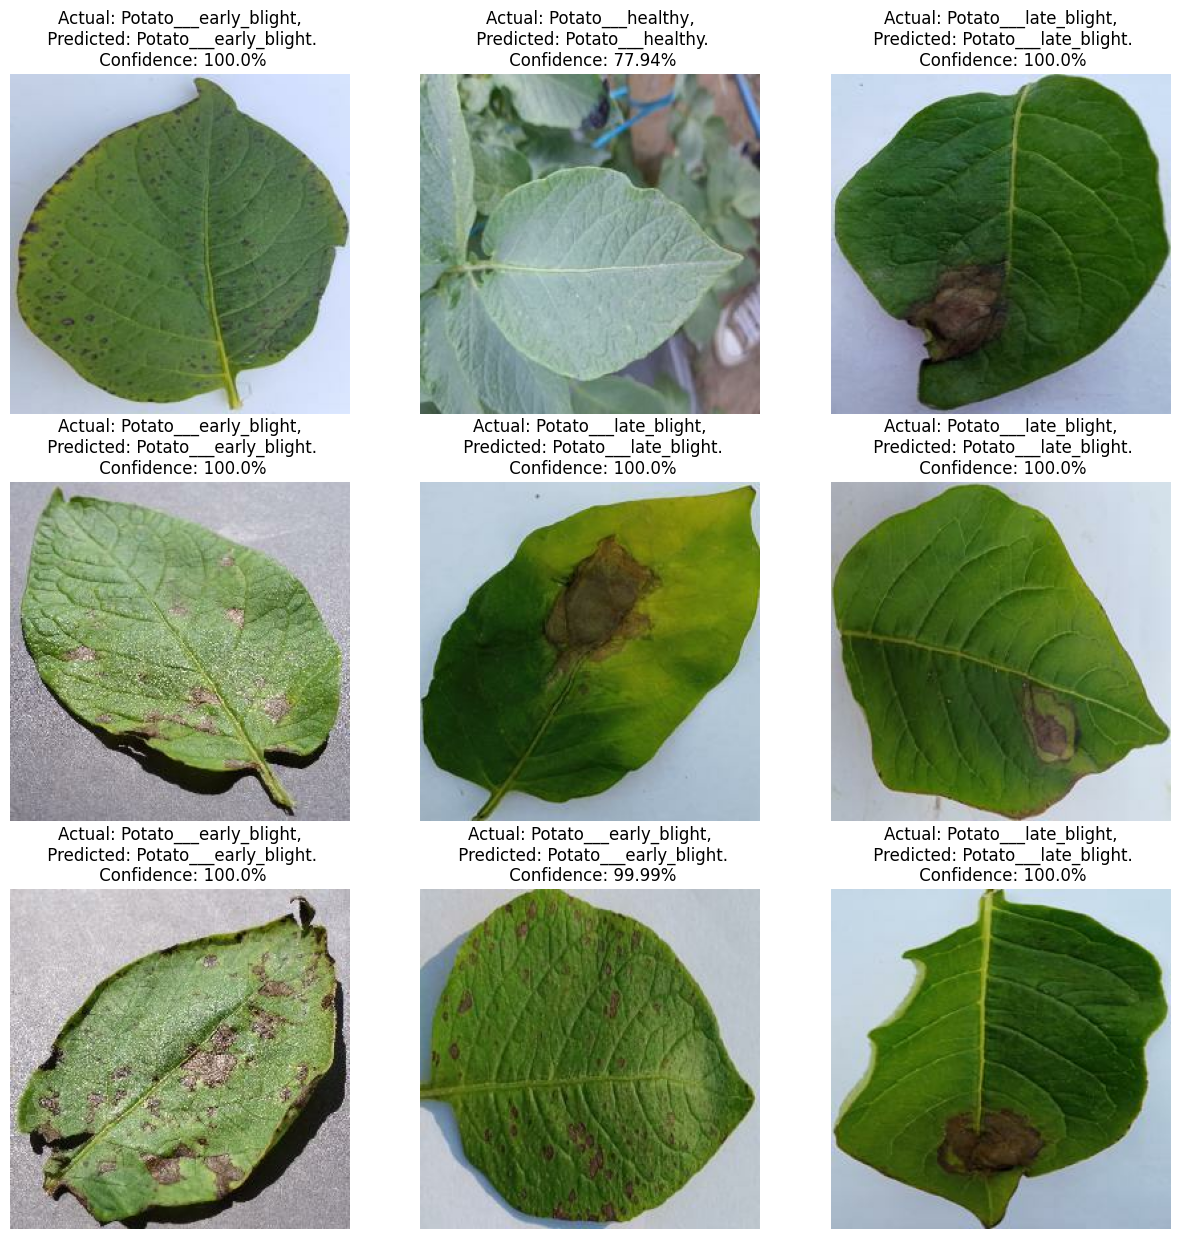

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Saving potato-early-blight-leaves.jpg to potato-early-blight-leaves.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


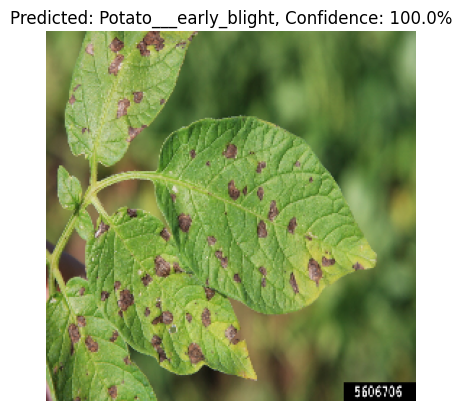

In [ ]:
# prompt: write a code so i can upload an image and test it

from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code) ...

# Function to predict the class of an uploaded image
def predict_uploaded_image(model, uploaded_image_path):
    img = tf.keras.preprocessing.image.load_img(uploaded_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    image_path = fn  # Get the uploaded file path
    predicted_class, confidence = predict_uploaded_image(model, image_path)

    # Display the image and prediction
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence}%")
    plt.axis('off')
    plt.show()

In [ ]:
# Create a new model excluding the preprocessing layers
model_without_preprocessing = models.Sequential(model.layers[4:])

# Save the model in HDF5 format
model_without_preprocessing.save('/content/drive/MyDrive/potato_disease_model2.h5')


In [ ]:
# prompt: write a code to deploy the model on fastapi


from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import tensorflow as tf
import numpy as np
import uvicorn
import os
import nest_asyncio
nest_asyncio.apply()

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/potato_disease_model.keras', custom_objects=)
class_names = ['Early_blight', 'Late_blight', 'healthy'] # Replace with your actual class names
IMAGE_SIZE = 256

app = FastAPI()

@app.get("/")
async def root():
    return {"message": "Potato Disease Prediction API"}

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Save the uploaded file temporarily
        contents = await file.read()
        with open("temp_image.jpg", "wb") as f:
            f.write(contents)

        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img("temp_image.jpg", target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make the prediction
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)

        # Remove the temporary file
        os.remove("temp_image.jpg")

        return JSONResponse({"class": predicted_class, "confidence": confidence})
    except Exception as e:
        return JSONResponse({"error": str(e)}, status_code=500)

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8080)

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 162, in startup
    server = await loop.create_server(
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1519, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 99] error while attempting to bind on address ('::1', 8000, 0, 0): cannot assign requested address

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-de2026ee05cd>", line 50, in <cell line: 49>
    uvicorn.run(app, host="localhost", po

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 162, in startup
    server = await loop.create_server(
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1519, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 98] error while attempting to bind on address ('127.0.0.1', 8080): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-e8a91f434668>", line 50, in <cell line: 49>
    uvicorn.run(app, host="127.0.0.1", port=8080)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self

TypeError: object of type 'NoneType' has no len()

In [ ]:
# prompt: get me the tensorflow version
import tensorflow as tf
tf.__version__


'2.17.1'

In [ ]:
import PIL
from PIL import Image
import numpy as np
PIL.__version__

'11.0.0'

In [ ]:
# prompt: write a code for confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = tf.keras.models.load_model('/content/drive/MyDrive/potato_disease_model2.h5')
# Get predictions on the test set
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

ValueError: Layer count mismatch when loading weights from file. Model expected 0 layers, found 6 saved layers.